## Required Assignment 6.2: Conducting the K-Means Algorithm in Python

**Expected Time: 120 Minutes**

**Total Points: 28 Points**

This exercise focuses on initially choosing the center points for each of the clusters.  Given three different datasets, you should choose cluster centers that make sense given the data.  Here, we will choose the centers given specific options.  Think about a more general approach to selecting the centers as you work through these examples. 

Next, you will be asked to compute the within-cluster sum of squares is computed.  Once the sum of squares for each cluster center and observation are determined, a label is chosen based on the smallest sum of squares.  Finally, within each of these clusters, the centers are updated based on the within-cluster mean.  Formally, the KMeans objective function is:

$${\displaystyle {\underset {\mathbf {S} }{\operatorname {arg\,min} }}\sum _{i=1}^{k}\sum _{\mathbf {x} \in S_{i}}\left\|\mathbf {x} -{\boldsymbol {\mu }}_{i}\right\|^{2}={\underset {\mathbf {S} }{\operatorname {arg\,min} }}\sum _{i=1}^{k}|S_{i}|\operatorname {Var} S_{i}}$$


In the last part of this assignment, you will focus on using `sklearn` to perform `KMeans` clustering.  You will compare initialization methods and determine the "right" number of clusters using an elbow plot.  The data are again produced using `sklearn`.  

## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)
- [Problem 6](#Problem-6)
- [Problem 7](#Problem-7)
- [Problem 8](#Problem-8)
- [Problem 9](#Problem-9)
- [Problem 10](#Problem-10)

In [1]:
from sklearn.datasets import make_blobs, make_circles, make_moons
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d

### Creating Data

Using the `sklearn` dataset utilities, we create and plot three datasets below.  Your task will be to determine a starting place for the clusters by choosing appropriate cluster centers.  The clusters have been colored according to the labels created for demonstration purposes.  Recall that in a real clustering scenario, you won't have labels on your data.

In [2]:
n_samples = 1500

[Back to top](#Index:) 

## Problem 1

### Choosing Initial Centers

**6 Points**

Which of the following options do you think would serve as good initial cluster centers for the dataset "Cluster Group I" visualized below?  Enter your answer as a string to `ans1` below.  

```
a) (-2, -5), (2, -5), (10, -5)
b) (-5, -5), (2, 2), (2, -7)
c) (-2, 5), (8, 5), (10, -5)
```

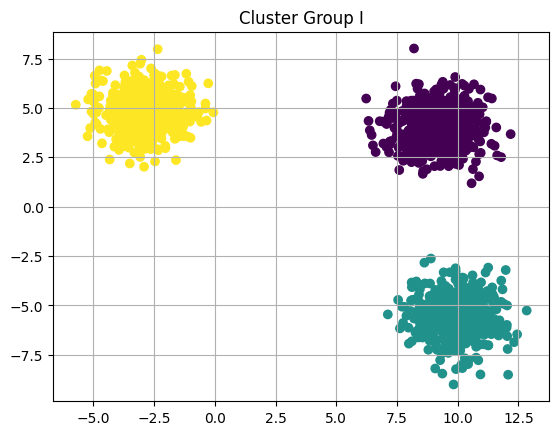

In [3]:
X1, Y1 = make_blobs(n_samples=n_samples, random_state=24)
plt.scatter(X1[:, 0], X1[:, 1], c = Y1)
plt.title('Cluster Group I')
plt.grid();

In [4]:
### GRADED

ans1 = ''

### BEGIN SOLUTION
ans1 = 'c'
### END SOLUTION

[Back to top](#Index:) 

## Problem 2

## Choosing Initial Centers

**6 Points**

Below, a second dataset is created.  Again, your task is to identify what appropriate starting centers could be.  Assign your answer as a string to `ans2` below.

```
a) (-6, 5), (-1, 5), (3, 5)
b) (-4, -7), (1, 6), (3, -7)
c) (-6, 6), (0, 7), (6, 7)
```

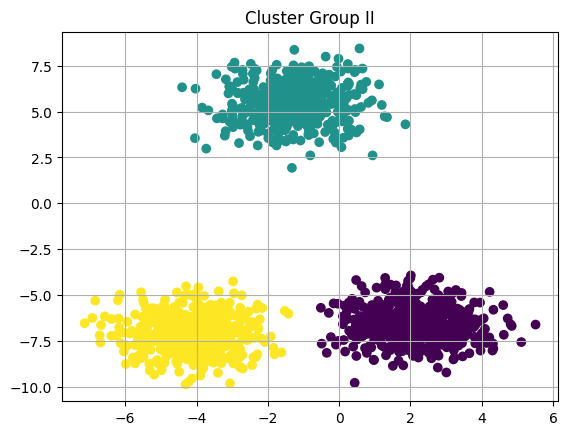

In [5]:
X2, Y2 = make_blobs(n_samples=n_samples, random_state=111)
plt.scatter(X2[:, 0], X2[:, 1], c = Y2)
plt.grid()
plt.title('Cluster Group II');

In [6]:
### GRADED

ans2 = ''

### BEGIN SOLUTION
ans2 = 'b'
### END SOLUTION

[Back to top](#Index:) 

## Problem 3

### Choosing Initial Centers

**6 Points**

Once again, given the data below, choose the best initial centers for clustering.  Assign your answer as a string to `ans3` below.  

```
a) (-5, -10), (7, 0), (10, 0)
b) (-5, -10), (7, 10), (10, 10)
c) (-5, -10), (7, 0), (10, 10)
```

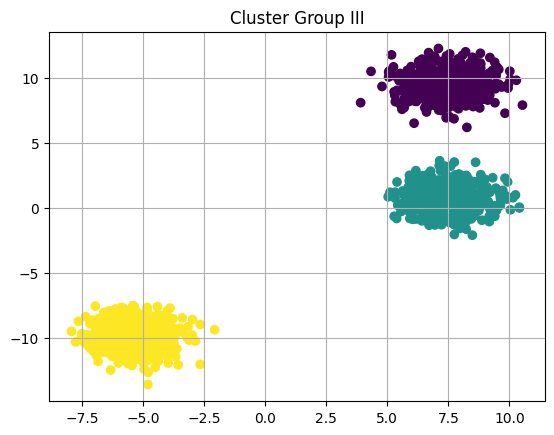

In [7]:
X3, Y3 = make_blobs(n_samples=n_samples, random_state=8)
plt.scatter(X3[:, 0], X3[:, 1], c = Y3)
plt.grid()
plt.title('Cluster Group III');

In [8]:
### GRADED

ans3 = ''

### BEGIN SOLUTION
ans3 = 'c'
### END SOLUTION

For the next part of the assignment, you will use the built-in dataset generator from `sklearn` to create a small dataset to demonstrate a simple case of KMeans clustering.  The data is created and plotted below.  It seems there are three clusters, so we assume there should be three cluster centers.

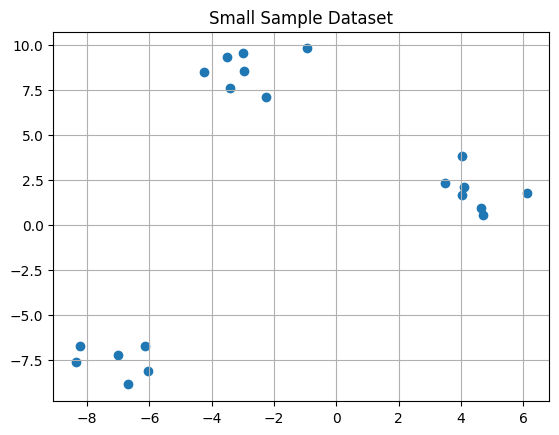

In [9]:
X1, _ = make_blobs(n_samples=20, random_state=42)
plt.scatter(X1[:, 0], X1[:, 1])
plt.title('Small Sample Dataset')
plt.grid();

### Creating a `DataFrame`

Using `pandas`, a `DataFrame` is created to hold the small dataset.  The features are named `X1` and `X2`.  The `DataFrame` is named `df`.

In [10]:
#create DataFrame of samples
df = pd.DataFrame(X1, columns = ['X1', 'X2'])
df.head()

,X1,X2
0,-2.978672,9.556846
1,-4.234115,8.451999
2,-3.522029,9.328533
3,-2.267235,7.101006
4,3.488885,2.348868


### Randomly Selecting Centers

As noted, we will make initial cluster centroid assignments based on a random selection of data from the samples.  Below, the `.sample` method from the DataFrame is used to select three points at random.  These are assigned to the variable `centroids` as a DataFrame.

In [11]:
centroids = df.sample(3, random_state = 11).reset_index(drop = True)
centroids

,X1,X2
0,-2.267235,7.101006
1,-8.207813,-6.683248
2,-6.670764,-8.839780


### Assigning initial centroid values

Now, we select the individual centroid values and assign them as `c1`, `c2`, `c3` below. 

In [12]:
c1 = centroids.iloc[0, :2].values
c2 = centroids.iloc[1, :2].values
c3 = centroids.iloc[2, :2].values

### Inner cluster sum of squares

To find the intercluster variance, we can use the `np.linalg.norm` function.  This finds the distances squared from each of the cluster centers to each data point.  These distances are assembled into a DataFrame called `dist_df` and the three columns represent the three cluster centers.  Note that there should be a value of zero in each column because the centers were chosen as data points from the dataset.  

In [13]:
d1 = np.linalg.norm(df.iloc[:, :2] - c1, axis = 1)**2
d2 = np.linalg.norm(df.iloc[:, :2] - c2, axis = 1)**2
d3 = np.linalg.norm(df.iloc[:, :2] - c3, axis = 1)**2

In [14]:
dist_df = pd.DataFrame(np.array([d1, d2, d3]).T, columns = ['d1', 'd2', 'd3'])
dist_df

,d1,d2,d3
0,6.537294,291.084588,352.067384
1,5.693799,244.865975,304.942851
2,6.536386,278.333733,340.002135
3,0.000000,225.296131,273.499707
4,55.715742,218.391876,228.404296
5,225.296131,0.000000,7.013149
6,2.592963,259.415173,316.030533
7,85.782948,222.456907,222.790167
8,65.653774,228.237683,235.243327
9,69.142938,219.958929,225.401001


[Back to top](#Index:) 

## Problem 4

### What were the original centers

**2 Points**

In the distance data above, which data point was the original centroid of the first column?  Assign the index of the datapoint as an integer to `ans4` below.

In [15]:
### GRADED

ans4 = None

### BEGIN SOLUTION
ans4 = 3
type(ans4)
### END SOLUTION

# Answer check
print(ans4)
print(type(ans4))

3
<class 'int'>


### Finding the `argmin`

For each of the observations, we want to assign them to the cluster where the intercluster variance is minimized.  To do so, we can use the `np.argmin` function and apply it across the rows.  Note that this returns a label for which cluster the point will be assigned.  These labels are added to the original DataFrame and the points are plotted. 

In [16]:
np.argmin(dist_df.values, axis = 1) #finding smallest variance
df['cluster label'] = np.argmin(dist_df.values, axis = 1) #create new column of labels
df.head()

,X1,X2,cluster label
0,-2.978672,9.556846,0
1,-4.234115,8.451999,0
2,-3.522029,9.328533,0
3,-2.267235,7.101006,0
4,3.488885,2.348868,0


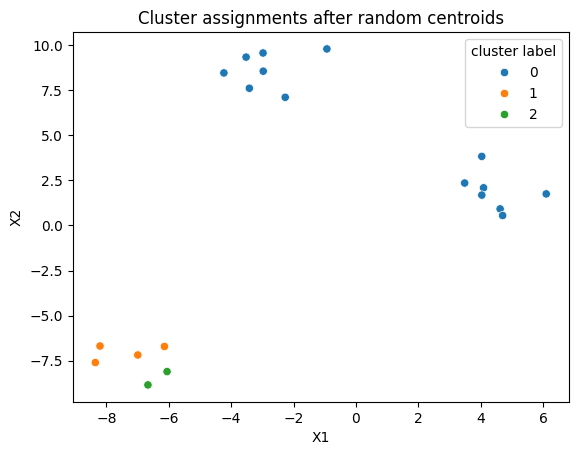

In [17]:
sns.scatterplot(data = df, x = 'X1',y = 'X2', hue = 'cluster label', palette='tab10')
plt.title('Cluster assignments after random centroids');

[Back to top](#Index:) 

## Problem 5

### Initial Cluster Assignments

**2 Points**

Now that the clusters have been assigned, what do you think of the initial assignments?  Did they end up matching with what your intuitive assignments would be?  Assign your solution to `ans5` below as a boolean value, `True` representing if the cluster assignments are "good", `False` if they are "bad". 

In [18]:
### GRADED

ans5 = None

### BEGIN SOLUTION
ans5 = False
### END SOLUTION

# Answer check
print(ans5)

False


### Compute new centroids

Using the new labels for the cluster centers, the final step is to update the random centroids based on the averages of each cluster.  One approach is to use the `groupby` method to group by the initial labels and aggregate based on the mean.  Below, we save these as a DataFrame named `new_centers` and plot the updated centroids in the scatterplot as red star markers.  

In [19]:
new_centers = df.groupby('cluster label').mean()

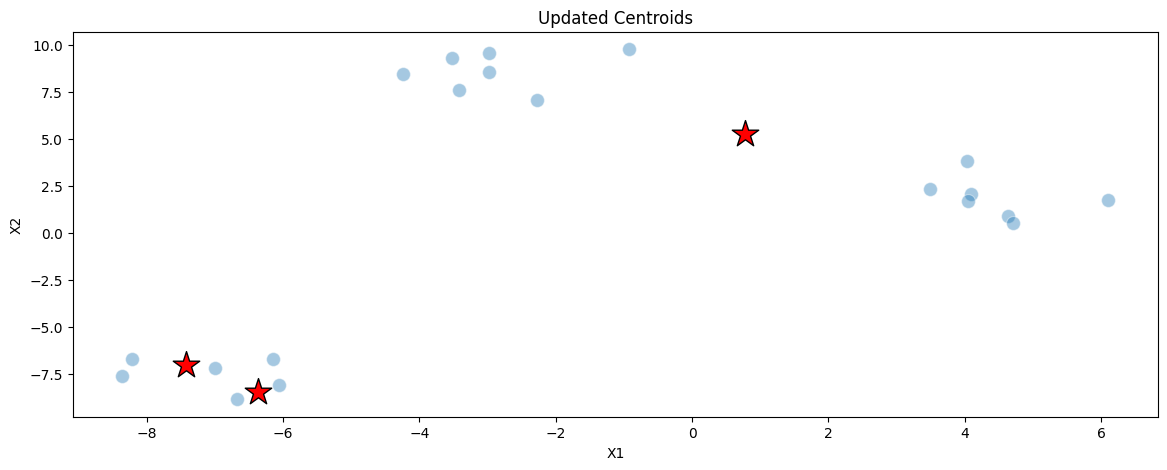

In [20]:
plt.figure(figsize = (14, 5))
sns.scatterplot(data = df, x = 'X1',y = 'X2',s = 100, alpha = 0.4)
plt.title('Updated Centroids');
plt.scatter(new_centers['X1'], new_centers['X2'], marker = '*', s = 400, c = 'red', edgecolor = 'black')

### Creating the Data

For the last part of the assignment, the data is created with a known number of cluster centers to make the evaluation of the clustering more straightforward.  A dataset with three features and four clusters is created and plotted below.  Your task is to uncover these clusters using `KMeans`.  

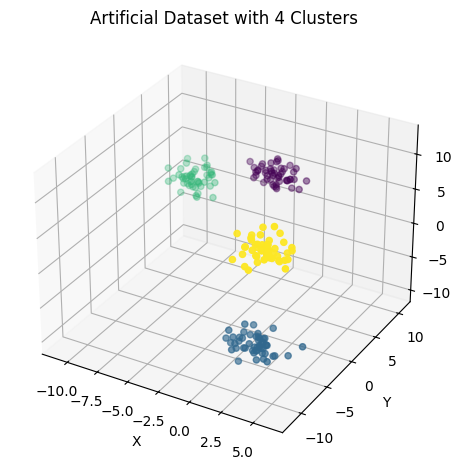

In [21]:
X, y = make_blobs(n_samples=200, n_features=3, centers = 4, random_state=42)
ax = plt.axes(projection = '3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c = y)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Artificial Dataset with 4 Clusters')
plt.tight_layout();

[Back to top](#Index:) 

## Problem 6

### Instantiate `KMeans`

**2 Points**

To begin, you are to create an instance of the `KMeans` clustered.  Slightly different than the lectures, we directly import the `KMeans` object. 

Instantiate a `KMeans()` classifier and assign the result to `kmeans`.


Inside the `KMeans()` classifier, set `random_state = 42`.

In [22]:
### GRADED

kmeans = '' #Don't Forget to set the random_state!!!

### BEGIN SOLUTION
kmeans = KMeans(random_state=42)
### END SOLUTION

# Answer check
print(kmeans)

KMeans(random_state=42)


[Back to top](#Index:) 

## Problem 7

### Using `KMeans`

**2 Points**

To conduct the `KMeans` clustering algorithm on the data, use the `.fit()` method on `kmeans` with argument equal to `X`.  

This will run the clustering algorithm on our data and make clustering assignments accordingly.  

In [23]:
### GRADED

kmeans = '' #Don't Forget to set the random_state!!!

### BEGIN SOLUTION
kmeans = KMeans(random_state=42)
kmeans.fit(X)
### END SOLUTION

# Answer check
print(kmeans)

KMeans(random_state=42)


[Back to top](#Index:) 

## Problem 8

### Trying different numbers of clusters

**2 Points**

Our first cluster model used 8 cluster centers.  


Below, use a `for` loop to create a list of inertia scores for models with $1, 2, 3, ..., 10$ cluster centers and append the `.inertia_` value for each to the list `inertias`.  Note that for each instance of `KMeans` you create, set `n_clusters` equal to `i` and the `random_state` equal to `42`.  

In [24]:
### GRADED

inertias = [] 
#for each value 1 - 10

       #instantiate new KMeans instance
        #Don't Forget to set the random_state!!!
        
        #fit the model
        
        #append inertia score to inertias list

### BEGIN SOLUTION
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state=42).fit(X)
    inertias.append(kmeans.inertia_)
### END SOLUTION

# Answer check
print(inertias)
print(type(inertias))

[26101.998581982098, 8679.882995317123, 1713.285133655538, 554.3359020785318, 514.844614679354, 476.21328007904924, 441.22708952148594, 409.5172516187218, 391.0954527833868, 359.16654267940396]
<class 'list'>


[Back to top](#Index:) 

## Problem 9

### Plotting the results

**2 Points**

Now that we have inertia values for `n_clusters` 1, 2, 3, ..., 10, a plot is drawn of the resulting centers and inertia scores.  The $x$-axis should contain the number of cluster centers and the $y$-axis should represent the inertia scores.  Uncomment the plotting code to examine a plot of these inertia values by cluster centers.  According to this plot, which do you feel is the "right" number of cluster centers for the data?  Assign your answer as an integer to `best_n_clusters` below. 

In [25]:
### GRADED

#plt.plot(list(range(1, 11)), inertias, '--o')
#plt.xticks(list(range(1, 11)), list(range(1, 11)))
#plt.title('Inertia Score by n cluster centers');
best_n_clusters = ''

### BEGIN SOLUTION
best_n_clusters = 3
### END SOLUTION

# Answer check
print(best_n_clusters)
print(type(best_n_clusters))

3
<class 'int'>


[Back to top](#Index:) 

## Problem 10

### Repeat with `random` initialization of centroids

**2 Points**

Note that by default, the `KMeans` clustered in sklearn uses `kmeans++` to initialize the center of the clusters.  

Repeat the implementation of Problem 4 where you loop over values $1, 2, 3, ..., 10$ for the `n_clusters` but now initialize the centers randomly by setting the argument `init` equal to `random`.  Be sure to set `random_state = 42` and save your list of inertias to `random_inertias`.  


Does the idea number of clusters change?  Enter your response to the best number of cluster centers when using `random` initialization to `best_n_clusters_random` as an integer below.

In [26]:
### GRADED

random_inertias = [] 
best_n_clusters_random = ''


### BEGIN SOLUTION
random_inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init='random', random_state=42).fit(X)
    random_inertias.append(kmeans.inertia_)
best_n_clusters_random = 3
### END SOLUTION

# Answer check
print(random_inertias)
print(type(random_inertias))

[26101.998581982098, 8679.882995317123, 1713.285133655538, 554.3359020785318, 512.3646265768418, 476.1930457715392, 441.07711384916325, 414.2327651478467, 382.97991597719096, 356.0619479858318]
<class 'list'>
